# **Introducción al Quantum Machine Learning 1**
*Universidad Nacional Autónoma de México*
## Laboratorio Avanzado de Procesamiento de Imágenes

### Autor: **Sebastián González Juárez**

Académicos:
* Dr. Boris Escalante Ramírez
* Claudia Zendejas Morales
* Naomi Itzel Reyes Granados

Temas Selectos de Ingenieria III - **Introducción a la computación cuántica**.

*Nota*. Este notebook contiene contenido y se realizo a partir de la clase 5 de **Claudia Zendejas Morales** de la Cuarta Escuela de Verano de Cómputo Cúantico de la UNAM:

https://github.com/CECAv/cuarta_escuela_de_computo_cuantico/blob/main/CC_CECAv_05_Quantum_Machine_Learning.ipynb

Este ipynb agrega la posibilidad de utilizarlo con Google Colab sin necesidad de instalar nada sus computadoras. También se han adecuado partes del código que requerían actualizarse.

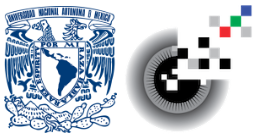

# **1. Quantum Machine Learning**

La idea básica es que queremos combinar conceptos de **Machine Learning** y **Computación Cuántica**

- Machine Learning: aprender patrones a partir de algunos datos de entrenamiento
- Computación Cuántica: uso de las ventajas cuánticas para resolver problemas computacionales, de forma más eficiente.

Podemos clasificar los tipos de ML/QML en las cuatro categorías siguientes:

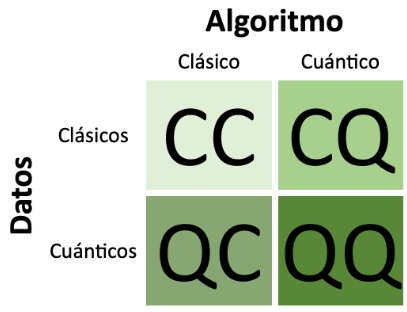

Se pueden clasificar los sistemas de información en dos aspectos clave: el tipo de datos (clásicos o cuánticos) y el tipo de procesamiento (clásico o mejorado con computación cuántica).

El enfoque actual se centra en el procesamiento mejorado con computación cuántica de datos clásicos.

**El objetivo del QML es combinar recursos clásicos y cuánticos con el objetivo de superar los enfoques tradicionales.**

## 1.1. ¿Sirve de algo estudiar QML?

Aunque el Quantum Machine Learning (QML) **no es ampliamente funcional hoy**, pero existen razones de peso para impulsar su desarrollo.

Hay proyectos que en su momento no se sabía a donde conducirían o el gran impacto que tendrían, de eso se trata hacer ciencia e investigación.

1. El electromagnetismo:

      Cuando Michael Faraday experimentaba con el electromagnetismo, lo hacía impulsado por una curiosidad científica sin un destino práctico claro. En su época, era imposible visualinar que aquellos fenómenos de laboratorio se convertirían en la base de toda la electrificación global, las comunicaciones y la electrónica moderna. Su trabajo no siguió un mapa, sino que dibujó el mapa de una nueva era tecnológica.

2. La IA:

      Por otro lado, durante el "Invierno de la IA", el escepticismo y la falta de fondos casi detienen el campo, pero la persistencia de algunos investigadores permitió que se convirtiera en la tecnología transformadora que es hoy.
Así, _la investigación temprana en QML_, aunque actualmente limitada, _es esencial para construir las bases de futuras aplicaciones y avances tecnológicos_.

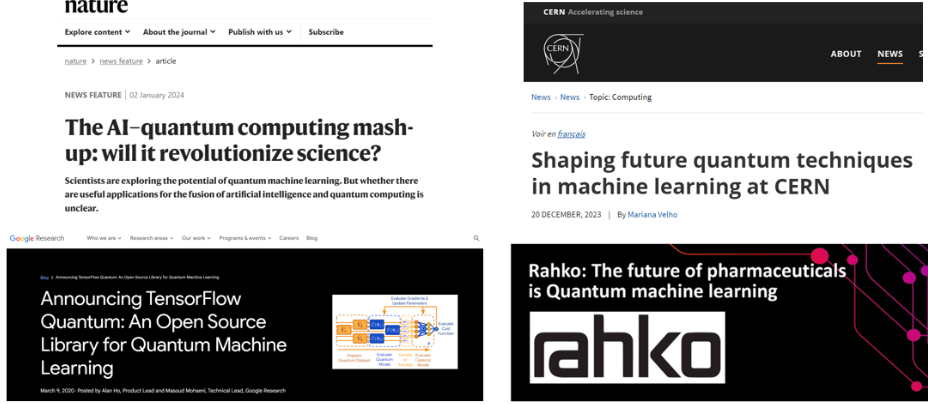

## **1.2. Algoritmos Variacionales**

Los **algoritmos variacionales** son métodos híbridos de computación cuántica diseñados para resolver problemas complejos como **optimización** y **simulación**. combinan lo mejor de los enfoques clásicos y cuánticos, aprovechando las capacidades de las computadoras cuánticas de manera efectiva, incluso con el hardware cuántico ruidoso disponible actualmente.

Una parte del algoritmo se ejecuta en una computadora cuántica, y otra parte se ejecuta en una computadora clásica:
- Componente cuántico: Prepara y mide estados cuánticos.
- Componente clásico: Optimiza los parámetros del circuito cuántico según los resultados.

Los algoritmos variacionales es un ciclo de optimización iterativo que requieren de:

  1) Ejecución y Medición Cuántica: El circuito cuántico, con sus parámetros actuales, prepara un estado y se realiza una medición.

  2) Función de Costo: Se define una función específica para el problema (ej: la energía de una molécula en química cuántica), que el algoritmo busca minimizar o maximizar.

  3) Procesamiento Clásico y Ajuste: La computadora clásica recibe los resultados, calcula el valor de la función de costo y utiliza un optimizador para ajustar los parámetros del circuito.

Este ciclo medir-ajustar-ejecutar se repite hasta que la función converge a un valor óptimo o satisfactorio, encontrando así la solución.

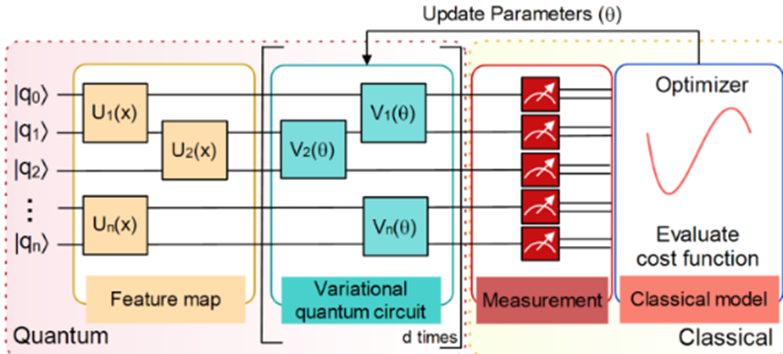

### Tipos Comunes de Algoritmos Variacionales

1. **Variational Quantum Eigensolver (VQE)**:
   - Utilizado principalmente para encontrar los estados de energía más bajos (autovalores) de un sistema cuántico, como en problemas de química cuántica.
   - VQE prepara un estado cuántico en un circuito parametrizado y mide la energía. Luego, un optimizador clásico ajusta los parámetros para minimizar la energía medida.

2. **Quantum Approximate Optimization Algorithm (QAOA)**:
   - Diseñado para resolver problemas de optimización combinatoria.
   - QAOA utiliza un enfoque parametrizado similar al VQE, pero está enfocado en encontrar aproximaciones cercanas a la solución óptima de problemas de optimización.

3. **Quantum Neural Networks (QNNs)**:
   - Inspiradas en las redes neuronales clásicas, las QNNs utilizan qubits y compuertas cuánticas para representar y manipular la información.
   - Los parámetros del circuito cuántico se entrenan utilizando algoritmos variacionales para aprender patrones y realizar tareas como la clasificación.

### Ventajas y Desafíos

**Ventajas**:
- Pueden aprovechar el **paralelismo cuántico** y las propiedades cuánticas como la **superposición** y el **entrelazamiento** para explorar espacios de solución más rápidamente que los algoritmos clásicos.
- Funcionan **bien con el hardware cuántico ruidoso** disponible actualmente.

**Desafíos**:
- Requieren **algoritmos de optimización clásicos eficientes** para ajustar los parámetros del circuito cuántico.
- Sensibles al ruido y a los errores en los qubits, lo que puede afectar la precisión de las soluciones.

## **1.3. Ejemplo sencillo de Algoritmo Variacional**

Problema: Hacer un algoritmo capaz de encontrar un solo parámetro que defina a un estado cuántico buscado de un qubit.

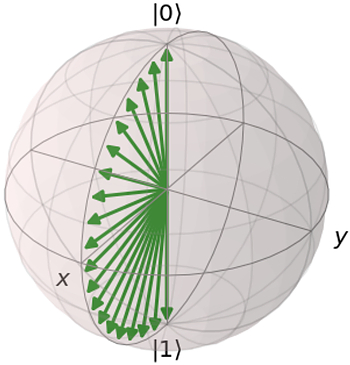

Inicialmente queremos encontrar los grados a rotar un qubit que comienza en el estado $|0\rangle$ para que llegue al estado $|1\rangle$, haciendo una rotación alrededor del eje $Y$ y nosotros dando un primer ángulo.

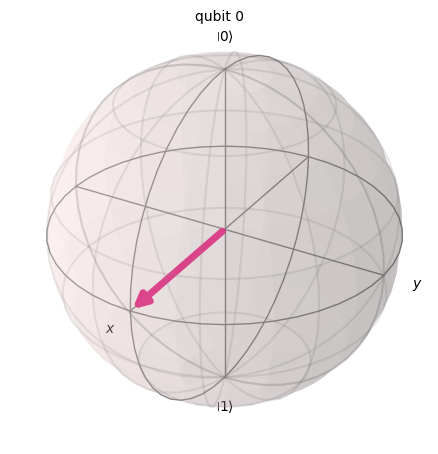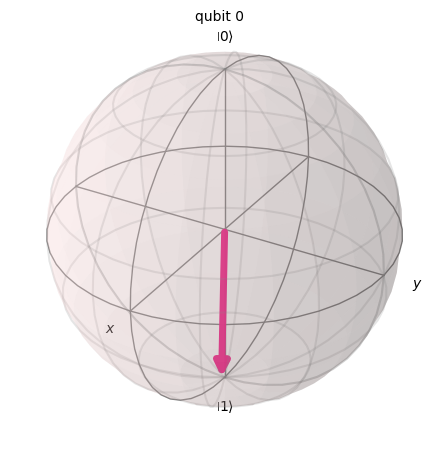

Descargas e importaciones:

In [1]:
!pip -q install qiskit scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.3 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit
import qiskit.quantum_info as qi
from qiskit.visualization import plot_bloch_multivector

import numpy as np
from math import radians, degrees
from scipy.optimize import minimize
import random

np.random.seed(0)
random.seed(0)

### Función de Costo:

Creamos una función que toma como entrada la probablidad de medir el estado |1⟩ y devuelve una medida de "error" o costo.

In [3]:
def costo_edo_1(proba_edo_1):
    return 1 - proba_edo_1     # diferencia de probabilidad de que sea 1

La idea es utilizar dicha función como si se tratase de nuestro optimizador y buscar minimizar que en este caso es que cuando alcancemos el cero signifique que tenemos probabilidad 1 de medir 1.

### VQA sencillo:

La siguiente función se encarga de:

Crear circuito → Obtener statevector → Estimar la probabilidad de que sea el estado 1 → Aplicar función de costo → mostrar avance.

In [4]:
def fn_objetivo(angle, fn_costo, shots=2000):
    qc = QuantumCircuit(1)                 # Qubit inicial en |0⟩
    qc.ry(radians(angle[0]), 0)            # Rotación en Y por 'angle[0]' grados
    sv = qi.Statevector(qc)                # estado resultante |ψ⟩

    counts = sv.sample_counts(shots=shots) # estimamos p(1) ≈ counts['1']/shots (frecuencia relativa)
    proba_edo_1 = counts.get('1', 0)/shots

    cost = fn_costo(proba_edo_1)
    print(f"Intento: ángulo θ = {float(angle[0]):8.4f}°  , p(1)≈{proba_edo_1:.6f}  , cost={cost:.6f}")
    return cost

Definimos un valor inicial para el parámetro que estamos buscando:

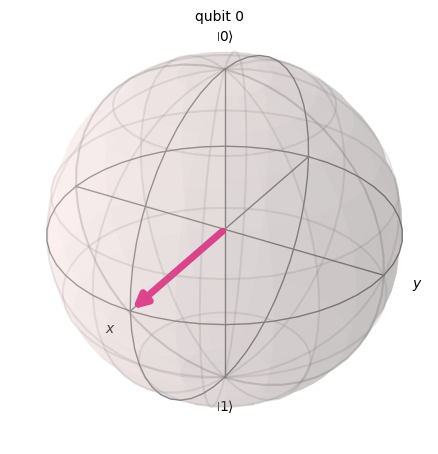

In [5]:
initial_guess = 90

qc = QuantumCircuit(1)
qc.ry(np.deg2rad(initial_guess), 0)
ig = qi.Statevector(qc)

fig = plot_bloch_multivector(ig)
display(fig)

Usamos la función `minimize` del paquete `scipy` para encontrar el valor del ángulo que estamos buscando:

Intento: ángulo θ =  90.0000°  , p(1)≈0.516000  , cost=0.484000
Intento: ángulo θ =  90.0000°  , p(1)≈0.506000  , cost=0.494000
Intento: ángulo θ =  91.0000°  , p(1)≈0.507500  , cost=0.492500
Intento: ángulo θ =  92.6180°  , p(1)≈0.516500  , cost=0.483500
Intento: ángulo θ =  95.2361°  , p(1)≈0.546500  , cost=0.453500
Intento: ángulo θ =  99.4721°  , p(1)≈0.585000  , cost=0.415000
Intento: ángulo θ = 110.4943°  , p(1)≈0.671500  , cost=0.328500
Intento: ángulo θ = 128.3287°  , p(1)≈0.813000  , cost=0.187000
Intento: ángulo θ = 157.1852°  , p(1)≈0.962000  , cost=0.038000
Intento: ángulo θ = 186.2640°  , p(1)≈0.994500  , cost=0.005500
Intento: ángulo θ = 233.3144°  , p(1)≈0.796000  , cost=0.204000
Intento: ángulo θ = 204.2356°  , p(1)≈0.963500  , cost=0.036500
Intento: ángulo θ = 175.1569°  , p(1)≈0.999000  , cost=0.001000
Intento: ángulo θ = 176.2471°  , p(1)≈0.999500  , cost=0.000500
Intento: ángulo θ = 178.3612°  , p(1)≈1.000000  , cost=0.000000
Intento: ángulo θ = 181.3798°  , p(1)≈0.

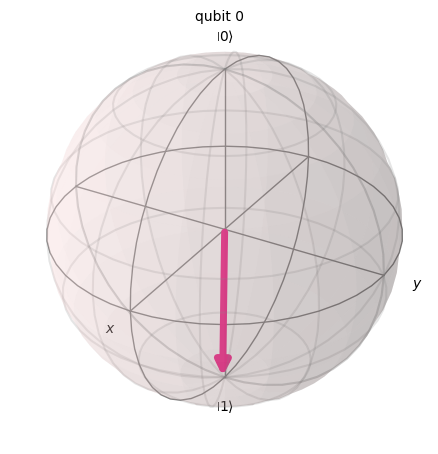

In [6]:
result_1 = minimize(fn_objetivo, initial_guess, args=(costo_edo_1,), method='Powell')
theta_opt_deg = float(result_1.x[0]) % 360
print("\nÁngulo optimizado (grados):", theta_opt_deg)

# Verificamos el estado que se logra con el parámetro encontrado en una esfera de Bloch:
qc = QuantumCircuit(1)
qc.ry(np.deg2rad(theta_opt_deg), 0)
sv = qi.Statevector(qc)

fig = plot_bloch_multivector(sv)
display(fig)

Ahora encontremos el valor del ángulo necesario para terminar en el estado $|-i\rangle$ y para eso hay que definir una función de costo que se haga mínimo cuando p(1)=0.5.

In [7]:
def costo_edo_menos_y(average_state):
    return (average_state - 0.5)**2

Definimos un valor inicial para el parámetro que estamos buscando:

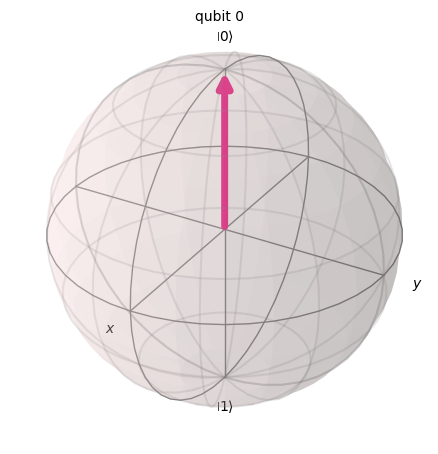

In [8]:
initial_guess = 0
qc = QuantumCircuit(1)
qc.ry(np.deg2rad(initial_guess), 0)
ig = qi.Statevector(qc)

fig = plot_bloch_multivector(ig)
display(fig)

Intento: ángulo θ =   0.0000°  , p(1)≈0.000000  , cost=0.250000
Intento: ángulo θ =   0.0000°  , p(1)≈0.000000  , cost=0.250000
Intento: ángulo θ =   1.0000°  , p(1)≈0.000000  , cost=0.250000
Intento: ángulo θ =   2.6180°  , p(1)≈0.000500  , cost=0.249500
Intento: ángulo θ =   5.2361°  , p(1)≈0.003500  , cost=0.246512
Intento: ángulo θ =   9.4721°  , p(1)≈0.008000  , cost=0.242064
Intento: ángulo θ =  46.8028°  , p(1)≈0.179000  , cost=0.103041
Intento: ángulo θ = 107.2051°  , p(1)≈0.661500  , cost=0.026082
Intento: ángulo θ = 102.4166°  , p(1)≈0.636000  , cost=0.018496
Intento: ángulo θ =  81.1740°  , p(1)≈0.423500  , cost=0.005852
Intento: ángulo θ =  68.0454°  , p(1)≈0.309500  , cost=0.036290
Intento: ángulo θ =  88.2846°  , p(1)≈0.476000  , cost=0.000576
Intento: ángulo θ =  89.1675°  , p(1)≈0.488500  , cost=0.000132
Intento: ángulo θ =  94.2282°  , p(1)≈0.537000  , cost=0.001369
Intento: ángulo θ =  90.7256°  , p(1)≈0.497500  , cost=0.000006
Intento: ángulo θ =  91.6329°  , p(1)≈0.

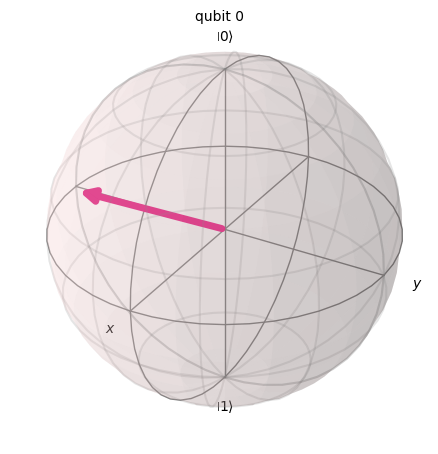

In [9]:
result = minimize(fn_objetivo, initial_guess, args=(costo_edo_menos_y,), method='Powell')

theta_opt_deg = float(result.x[0]) % 360
print("\nÁngulo optimizado (grados):", theta_opt_deg)

qc = QuantumCircuit(1)
qc.rx(np.deg2rad(theta_opt_deg), 0)
sv = qi.Statevector(qc)

fig = plot_bloch_multivector(sv)
display(fig)

# Otros notebooks:
https://github.com/Bayan0708/Quantum-Machine-Learning/tree/main/03_Introduction_to_QML_Class